In [2]:
import numpy as np
from scipy import stats
import statsmodels.api as sm

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

from matplotlib import rcParams
rcParams['figure.figsize'] = (12, 6)

/archive/Studies/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
data = pd.read_pickle('nsfg_data.pkl')

In [4]:
# successful pregnacies
live = data[data.outcome == 1]
# firstborns
firsts = live[live.birthord == 1] 
# subsequent births
others = live[live.birthord != 1]

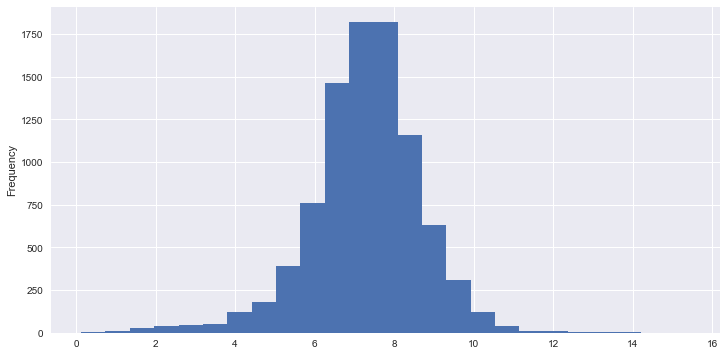

In [5]:
# frequency distribution
data.totalwgt_lb.dropna().plot.hist(bins=25)

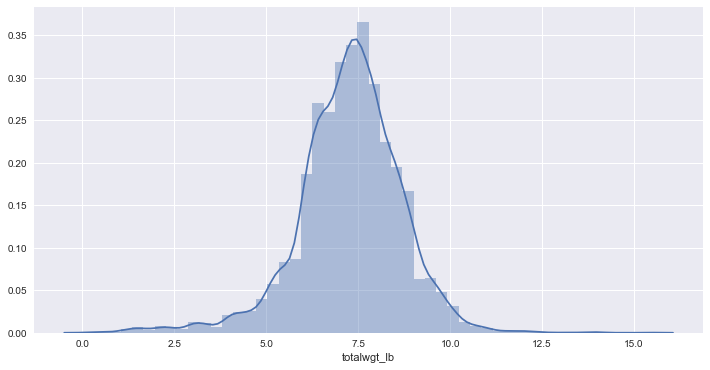

In [6]:
# seaborn dist fit against a normal distribution
sns.distplot(data.totalwgt_lb.dropna())

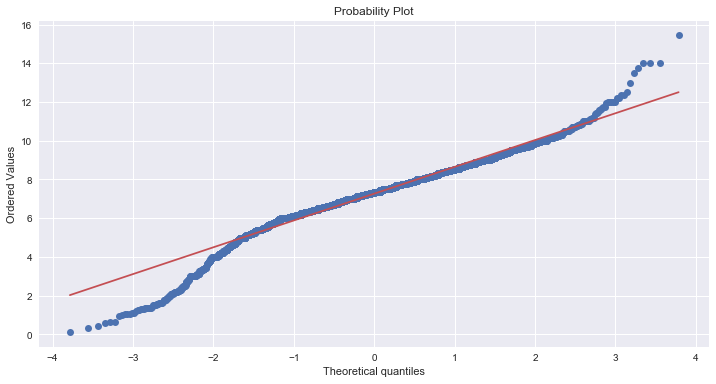

In [7]:
# probability plot showing skew & outliers
_ = stats.probplot(data.totalwgt_lb.dropna(), plot=plt)

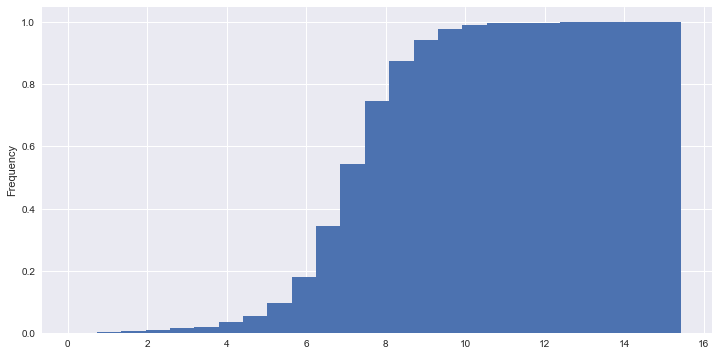

In [9]:
# cumulative density function
data.totalwgt_lb.dropna().plot.hist(bins=25, normed=True, cumulative=True)

In [10]:
# percentile ranks for birth weights
data.totalwgt_lb.rank(pct=True)

0        0.889577
1        0.680958
2        0.931511
3        0.385262
4        0.173600
5        0.847588
6        0.962270
7        0.806650
8        0.585251
9        0.286568
10       0.663753
11       0.385262
12       0.023622
13            NaN
14            NaN
15       0.620547
16       0.560909
17       0.202312
18            NaN
19       0.879177
20       0.767150
21       0.091005
22            NaN
23       0.317382
24       0.512613
25       0.334421
26       0.753098
27       0.428579
28       0.148927
29       0.536291
           ...   
13563    0.620547
13564    0.600631
13565    0.753098
13566    0.560909
13567         NaN
13568         NaN
13569    0.110367
13570    0.301062
13571    0.134156
13572    0.110367
13573    0.271631
13574    0.159770
13575         NaN
13576    0.233403
13577         NaN
13578    0.134156
13579    0.385262
13580         NaN
13581    0.217415
13582         NaN
13583         NaN
13584    0.217415
13585         NaN
13586         NaN
13587     

In [13]:
# quantiles for birth weights
data.totalwgt_lb.quantile(q=[0.2,0.4,0.6,0.8])

0.2    6.3125
0.4    7.0000
0.6    7.6250
0.8    8.3750
Name: totalwgt_lb, dtype: float64

In [16]:
# How is a weight of 7.5lbs ranked ?
stats.percentileofscore(data.totalwgt_lb.dropna(),7.5) 
# 56.1%

56.090949325071918

In [17]:
# Calculate the score at a given percentile
stats.scoreatpercentile(data.totalwgt_lb.dropna(), per=50) 
# 7.375

7.375

Explore the **statsmodels.distributions.empirical_distribution.ecdf** or equivalent function from scikit.statsmodels, for obtaining the cumulative density function of sampled data.

Both should return 
- ecdf.x : the input sample data sorted ?
- ecdf.y : the probability scores for each sample.

